In [ ]:
import matplotlib.pyplot as plt
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from pandasai.spreadsheets.utils import google_sheets_ai

LLM = OpenAI(api_token="TOKEN")
pandas_ai = PandasAI(LLM)

TEST1 = "https://docs.google.com/spreadsheets/d/1tNgmT4NzZAw7CpH52zOgolonRstXGlPT2XT9aHE-PsI/edit?usp=sharing"
TEST2 = "https://docs.google.com/spreadsheets/d/1SdgUPuYbxCl-AK9bLmHiizCrYsIXEQQz5PpBPCqO-rg/edit?usp=sharing"
TEST3 = "https://docs.google.com/spreadsheets/d/1q2OYWEtc25J_Es7hY911V-VZh5WpT1aeshCuEJcpFk4/edit?usp=sharing"
TEST4 = "https://docs.google.com/spreadsheets/d/1FKB4ZxsPWexUjlsNLAXCbI9wUbqG-lHNo5qaU7UEcx4/edit?usp=sharing"

## Test 1

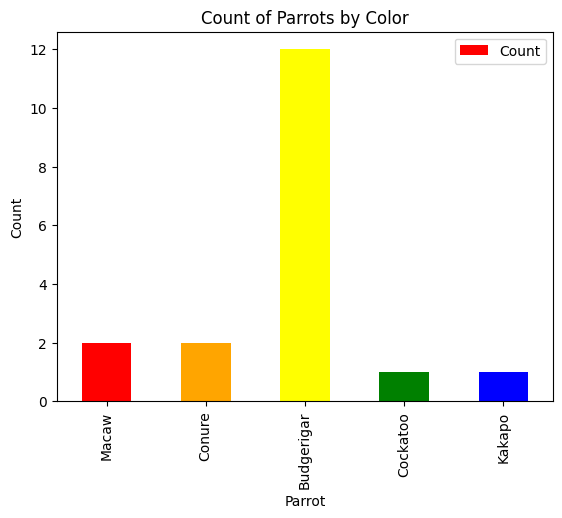

In [ ]:
prompt = "Plot a bar plot of the count of the parrot with the color of each bar corresponding to that of each parrot"

df = google_sheets_ai(
    url=TEST1, 
    prompt=prompt)

pandas_ai(df, prompt)

## Test 2

In [ ]:
prompt = "Show statistics for the salaries"
df = google_sheets_ai(
    url=TEST2, 
    prompt=prompt)

pandas_ai(df, prompt)

,work_year,salary,salary_in_usd,remote_ratio
count,99.000000,9.900000e+01,99.000000,99.000000
mean,2022.979798,1.848967e+05,164180.989899,43.434343
std,0.141407,1.667593e+05,68999.439121,49.304585
min,2022.000000,2.550000e+04,20984.000000,0.000000
25%,2023.000000,1.218000e+05,112840.000000,0.000000
50%,2023.000000,1.700000e+05,166000.000000,0.000000
75%,2023.000000,2.177500e+05,213205.000000,100.000000
max,2023.000000,1.650000e+06,342810.000000,100.000000


## Ambiguous Prompt Case
When tables can't be differentiated by their column names, or when the prompt does not uniquely specify a table by its columns, a warning should be given since the table will be chosen at random.

In [ ]:
prompt = "Show statistics for the fruits"
df = google_sheets_ai(
    url=TEST3, 
    prompt=prompt)

pandas_ai(df, prompt)

/Users/yassinkortam/Documents/GitHub/pandas-ai/spreadsheets/utils.py:154: UserWarning: 
            The prompt is too ambiguous. 
            - Please be more specific about the data table you are referencing by explicitly naming its unique columns.
            - Note that google sheets ai can only handle one dataframe at a time.
            
  warnings.warn(


,Fruit,Color,Diameter
count,4,4,4.00000
unique,4,3,NaN
top,Apple,Orange,NaN
freq,1,2,NaN
mean,NaN,NaN,13.00000
std,NaN,NaN,2.44949
min,NaN,NaN,10.00000
25%,NaN,NaN,11.50000
50%,NaN,NaN,13.50000
75%,NaN,NaN,15.00000


## Empty spreadheet case
Should throw an error since a df can't be selected 

In [ ]:
prompt = "Show statistics for the fruit"
df = google_sheets_ai(
    url=TEST4, 
    prompt=prompt)

pandas_ai(df, prompt)

ValueError: No dataframes found in the Google Sheet